## Analyzing the Wage Data

## Polynomial Regression and Step Functions

In [1]:
library(ISLR)
attach(Wage)

Warning message:
"package 'ISLR' was built under R version 3.6.1"

In [3]:
#Fit linear model using a 4th degree polynomial
fit=lm(wage~poly(age,4),data=Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287409,153.283015,0.000000e+00
"poly(age, 4)1",447.06785,39.9147851,11.200558,1.484604e-28
"poly(age, 4)2",-478.31581,39.9147851,-11.983424,2.355831e-32
"poly(age, 4)3",125.52169,39.9147851,3.144742,1.678622e-03
"poly(age, 4)4",-77.91118,39.9147851,-1.951938,5.103865e-02


In [4]:
#raw=True obtains polynomial directly
fit2=lm(wage~poly(age,4,raw=T),data=Wage)
coef(summary(fit2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
"poly(age, 4, raw = T)1",2.124552e+01,5.886748e+00,3.609042,0.0003123618
"poly(age, 4, raw = T)2",-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
"poly(age, 4, raw = T)3",6.810688e-03,3.065931e-03,2.221409,0.0263977518
"poly(age, 4, raw = T)4",-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


In [6]:
#Alternative, create polynomial basis functions with wrapper I()
fit2a=lm(wage~age+I(age^2)+I(age^3)+I(age^4),data=Wage)
coef(fit2a)

(Intercept)           age      I(age^2)      I(age^3)      I(age^4) 
-1.841542e+02  2.124552e+01 -5.638593e-01  6.810688e-03 -3.203830e-05

In [7]:
#Build matrix for a collection of vectors with cbind()
#Create values for age at which we want predictions
agelims=range(age)
age.grid=seq(from=agelims[1],to=agelims[2])
preds=predict(fit,newdata=list(age=age.grid),se=TRUE)
se.bands=cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit)

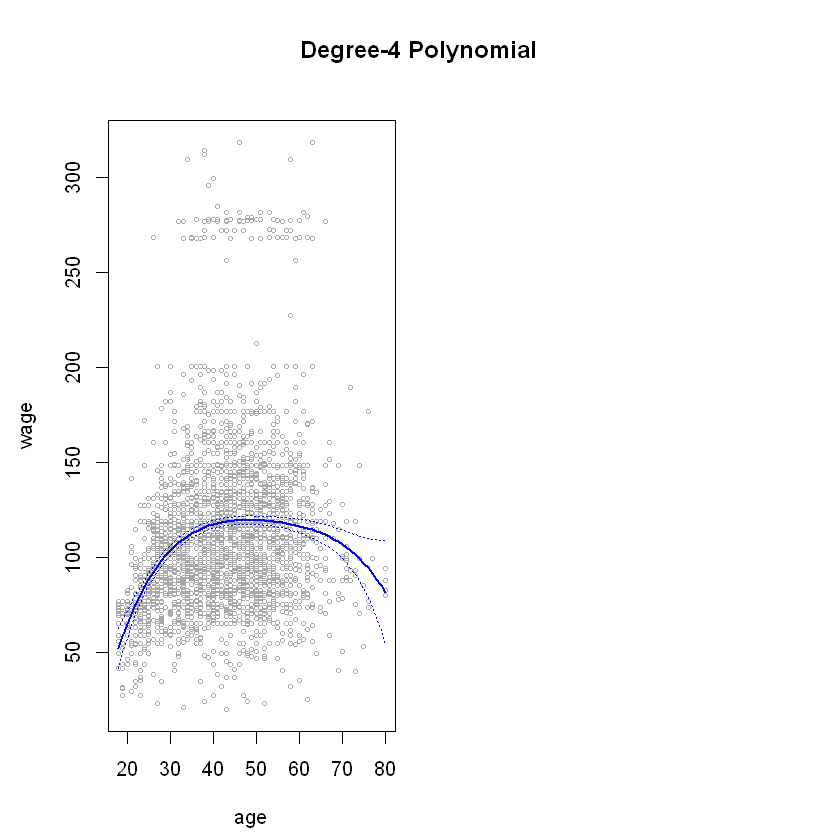

In [9]:
#Plot the data and add fit to 4th degree polynomial
#mar, oma, and par() control margines of plot
par(mfrow=c(1,2),mar=c(4.5,4.5,1,1), oma=c(0,0,4,0))
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
title("Degree-4 Polynomial",outer=T)
lines(age.grid,preds$fit,lwd=2,col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

In [10]:
preds2=predict(fit2,newdata=list(age=age.grid),se=TRUE)
max(abs(preds$fit-preds2$fit))

[1] 1.105604e-11

Hypothesis Test: Fit models ranging from Linear to 5th degre Polynomial.

Choose the simplest model that explains the relationship between age and wage.

Use anova() Analysis of Variance using F-test.
Tests null hypothesis that model M1 is sufficient to explain data against the null hypothesis of more complex M2 model.

M1 and M2 must be nested models, that is M1 must be a subset of predictors in M2.

In [13]:
#Fit 5 different models and compare sequentially
fit.1=lm(wage∼age,data=Wage)
fit.2=lm(wage∼poly(age,2),data=Wage)
fit.3=lm(wage∼poly(age,3),data=Wage)
fit.4=lm(wage∼poly(age,4),data=Wage)
fit.5=lm(wage∼poly(age,5),data=Wage)
anova(fit.1,fit.2,fit.3,fit.4,fit.5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2998,5022216,NA,NA,NA,NA
2997,4793430,1,228786.010,143.5931074,2.367734e-32
2996,4777674,1,15755.694,9.8887559,1.679213e-03
2995,4771604,1,6070.152,3.8098134,5.104623e-02
2994,4770322,1,1282.563,0.8049758,3.696820e-01


<b>P-Value is essentially 0 for 1st and 2nd Degree
    
    P-Value is 0.37 for 5th degree
    
    P-Value 3rd and 4th dgrees appear okay

In [14]:
#use poly() to create orthogonal polynomials instead of ANOVA
coef(summary(fit.5))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287647,153.2780243,0.000000e+00
"poly(age, 5)1",447.06785,39.9160847,11.2001930,1.491111e-28
"poly(age, 5)2",-478.31581,39.9160847,-11.9830341,2.367734e-32
"poly(age, 5)3",125.52169,39.9160847,3.1446392,1.679213e-03
"poly(age, 5)4",-77.91118,39.9160847,-1.9518743,5.104623e-02
"poly(age, 5)5",-35.81289,39.9160847,-0.8972045,3.696820e-01


Note: The p-values are essentially the same the square of t-stat is equal to F-stat from anova() function

In [16]:
#Example
(-11.9830341)^2

[1] 143.5931

In [17]:
#ANOVA method works whether or not orthogonal polys are used
#ANOVA works with other terms in model as well
fit.1=lm(wage~education+age,data=Wage)
fit.2=lm(wage~education+poly(age,2),data=Wage)
fit.3=lm(wage~education+poly(age,3),data=Wage)
anova(fit.1,fit.2,fit.3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2994,3867992,NA,NA,NA,NA
2993,3725395,1,142597.10,114.696898,2.728971e-26
2992,3719809,1,5586.66,4.493588,3.410431e-02


<b>Predict whether an individual earns more than $250k/year

In [18]:
#Create response vector and apply glm() using family=binomial
#Use I() wrapper to create binary response on the fly
fit=glm(I(wage>250)~poly(age,4),data=Wage,family="binomial")

In [23]:
preds=predict(fit,newdata=list(age=age.grid),se=T)

In [26]:
#type="link" to calculate confidence intervals
pfit=exp(preds$fit)/(1+exp(preds$fit))
se.bands.logit = cbind(preds$fit+2*preds$se.fit, preds$fit-2*
                      preds$se.fit)
se.bands = exp(se.bands.logit)/(1+exp(se.bands.logit))

In [27]:
#type="response" in predict() to directly compute probabilities
preds=predict(fit,newdata=list(age=age.grid),type="response", se=T)

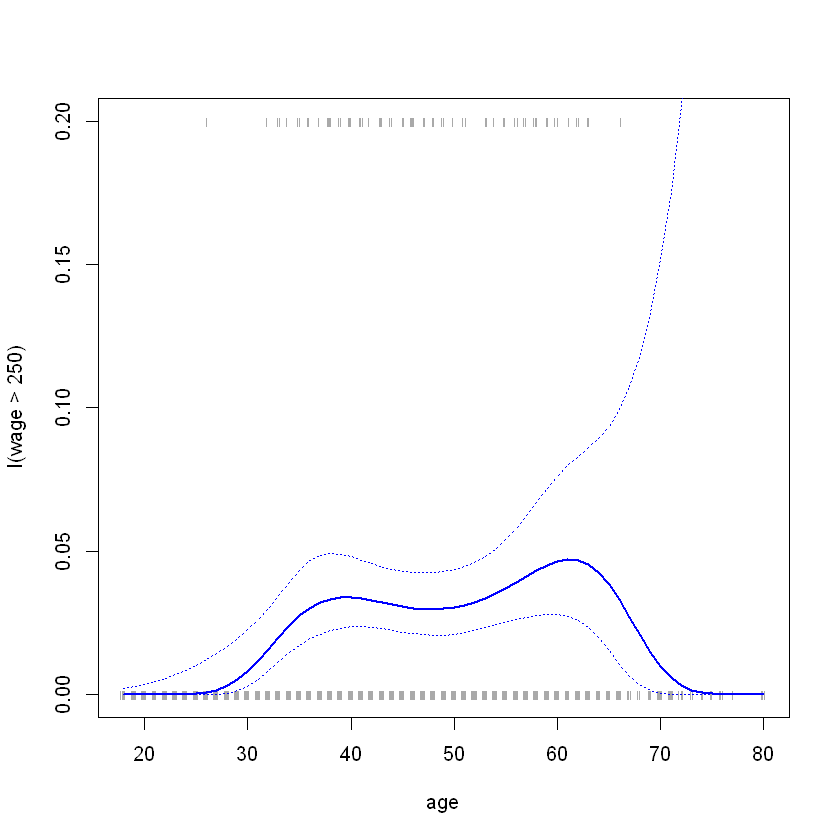

In [28]:
#Plot gray marks at tope and bottom with wage above and below 250
#Use jitter() function on age so same age values to not coverup
# also called "rug" plot
plot(age ,I(wage>250),xlim=agelims ,type="n",ylim=c(0,.2))
points(jitter(age), I((wage >250)/5),cex=.5,pch="|", col="darkgrey")
lines(age.grid ,pfit ,lwd=2, col="blue")
matlines (age.grid ,se.bands,lwd=1,col="blue",lty=3)

In [30]:
#cut() function to fit step function
#cut points at age 33.5, 49,, 64.5
#note: alternative to cut(), is using the "breaks" option
table(cut(age ,4))
fit=lm(wage~cut(age,4),data=Wage)
coef(summary(fit))


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),94.158392,1.476069,63.789970,0.000000e+00
"cut(age, 4)(33.5,49]",24.053491,1.829431,13.148074,1.982315e-38
"cut(age, 4)(49,64.5]",23.664559,2.067958,11.443444,1.040750e-29
"cut(age, 4)(64.5,80.1]",7.640592,4.987424,1.531972,1.256350e-01


Intercept coefficient of $94,160  is the average salary for those under 33.5 years of age. 

There is clearly an error in the book somewhere.

## Splines

Fit by constructing matrix basis function

logical(0)

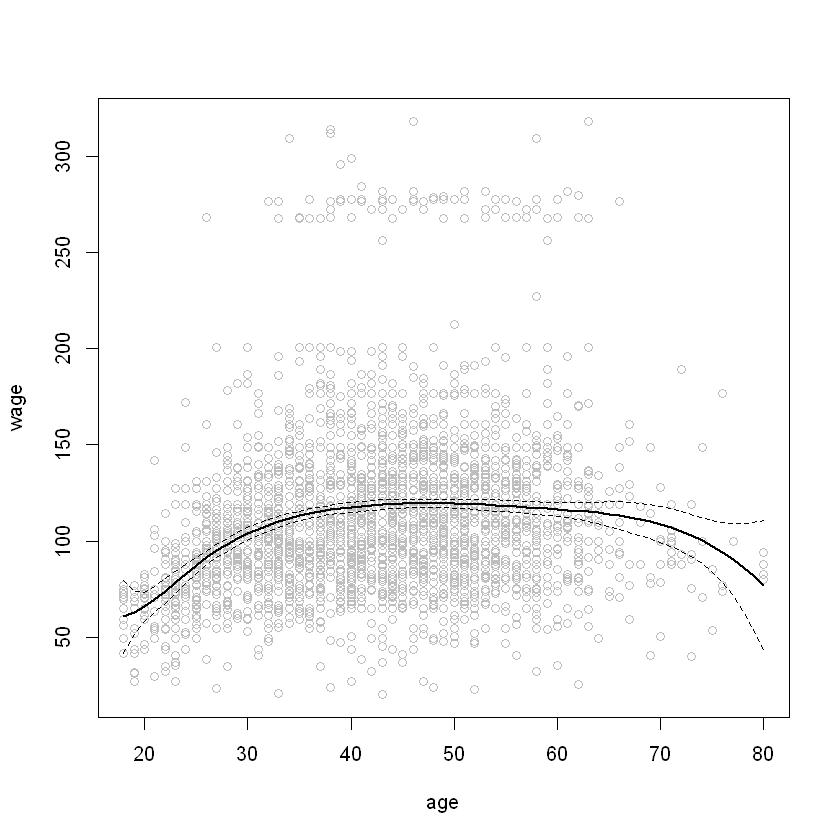

In [40]:
#bs() function for entire matrix of basis functions for splines
#specify knots
#cubic splines by default
library(splines)
fit=lm(wage∼bs(age,knots=c(25,40,60)),data=Wage)
pred=predict (fit ,newdata =list(age=age.grid),se=T)
plot(age ,wage ,col="gray")
lines(age.grid ,pred$fit ,lwd=2) > lines(age.grid ,pred$fit +2*pred$se ,lty="dashed")
lines(age.grid ,pred$fit -2*pred$se ,lty="dashed")

Note: cubic spline with three knots has seven degrees of freedom

Used by intercept and 6 basis functions

In [41]:
#use df option to produce spline with knots at uniform quantiles
dim(bs(age,knots=c(25,40,60)))

[1] 3000    6

In [42]:
dim(bs(age,df=6))

[1] 3000    6

In [43]:
attr(bs(age,df=6),"knots")

25%   50%   75% 
33.75 42.00 51.00

In [45]:
fit2=lm(wage~ns(age,df=4),data=Wage)
pred2=predict(fit2,newdata=list(age=age.grid),se=T)
lines(age.grid,pred2$fit,col="red",lwd=2)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet
